In [100]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

data_list = []

# for f_name in sorted(glob.glob("../entropia/mnist-repaired/ll_per_point_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion*")):
for f_name in sorted(glob.glob("../entropia/mnist-repaired/ll_per_point_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist*")):
    data = pd.read_csv(f_name, header=None, sep=" ")
#     print(f_name)
    if len(data) == 1000000:
        grouped = data.groupby([0], as_index=False).mean()
        data_list.append((data, grouped))

In [101]:
def calculate_coeff(data, min_i, max_i, log=False, plot=False, show=True):
    data = np.array(data)
    data_clean = data[np.all(~np.isnan(data), axis=1)]
    ind_sort = np.argsort(data_clean[:,0])
    data_clean = data_clean[ind_sort]
    d, ll = tuple(zip(*data_clean))

    d = d[min_i:max_i]
    ll = ll[min_i:max_i]

    d = np.array(d).reshape(-1,1)
    ll = np.array(ll)
    
    if log:
        d = np.log(d)

    regr = linear_model.LinearRegression()
    regr.fit(d, ll)
    ll_pred = regr.predict(d)

    if plot:
        plt.plot(d, regr.predict(d), label="prediction", c='r', alpha=0.5)
        plt.plot(d, ll, 'o-', alpha=0.5)
    if show:
        plt.show()
        
    return regr.coef_[0]

In [97]:
img_size = 32
channels = 1
n_pixel = (img_size ** 2) * channels

# plt.figure(figsize=(10,10))

dims = []
classes = []

for i in range(10000):
# for i in range(10):
    if i % 1000 == 0:
        print(i)
    to_plot = []
    for j in range(len(data_list)):
        line = data_list[j][1].iloc[i]
        to_plot.append([line[1], -(line[2] + line[3])])
    to_plot = np.array(to_plot)
    dims.append(n_pixel - calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=False, show=False))
#     dims.append(n_pixel - calculate_coeff(to_plot, 0, len(to_plot), log=True, plot=True, show=False))
    classes.append(line[4])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


680.3917626368801
635.6899934166262
716.069248130706
520.0328536427404
688.610456309136
322.50805872361246
644.5319347178769
330.1413317506911
2503.215376124045
458.50077238989127


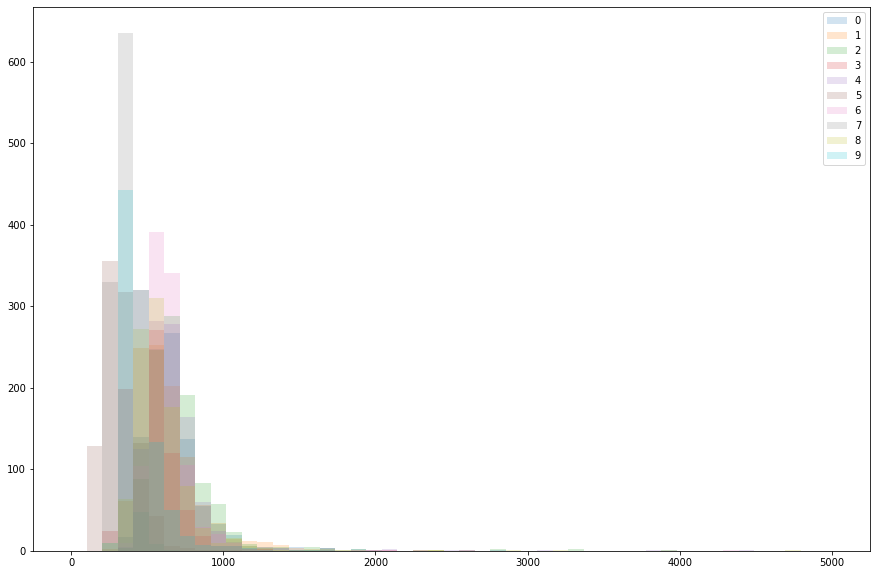

In [99]:
dims = np.array(dims)
classes = np.array(classes)
# plt.hist(dims, bins=100);
plt.figure(figsize=(15,10))
for i in range(10):
    print(np.mean(dims[classes==i]))
    plt.hist(dims[classes==i], alpha=0.2, label=str(i), bins = np.linspace(0, 5000, 50))
#     plt.show()
plt.legend();

117.86269017842925
57.088636552411614
109.2638562570923
107.76785980726139
95.78268054152562
102.8798361679728
101.68395179595456
87.09928590276586
114.65902630609958
94.92567530183612


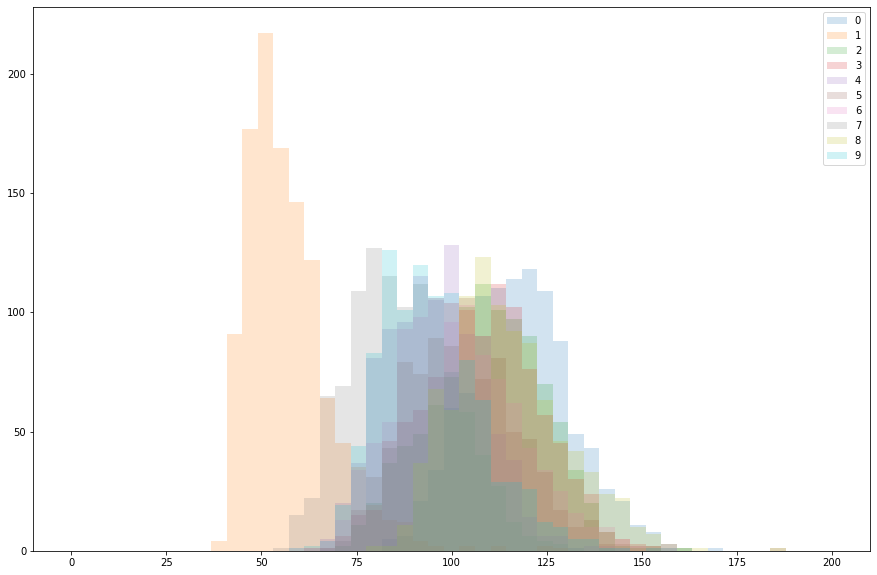

In [94]:
dims = np.array(dims)
classes = np.array(classes)
# plt.hist(dims, bins=100);
plt.figure(figsize=(15,10))
for i in range(10):
    print(np.mean(dims[classes==i]))
    plt.hist(dims[classes==i], alpha=0.2, label=str(i), bins = np.linspace(0, 200, 50))
#     plt.show()
plt.legend();

In [9]:
i = np.argmin(dims)

In [12]:
import sys
sys.path.append("/home/sonarhome/phd/glow-pytorch/")

from samplers import memory_mnist

In [13]:
train_loader, val_loader, train_val_loader, train_labels, val_labels = memory_mnist(
    1, 32, 1, return_y=True
)

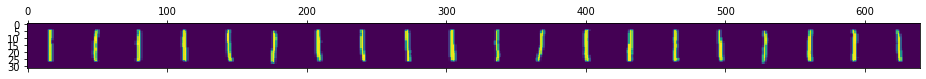

In [14]:
imgs = []
for i in dims.argsort()[:20]:
    imgs.append(train_loader.dataset[i][0])
plt.matshow(np.concatenate(imgs, axis=1))
plt.show()

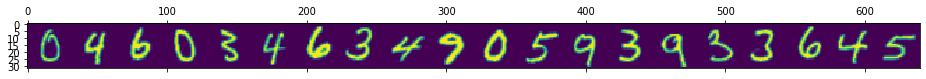

In [15]:
imgs = []
for i in dims.argsort()[5000:5020]:
    imgs.append(train_loader.dataset[i][0])
plt.matshow(np.concatenate(imgs, axis=1))
plt.show()

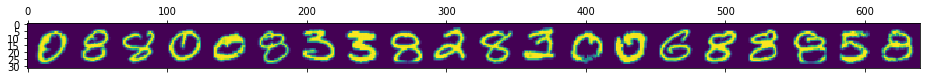

In [16]:
imgs = []
for i in dims.argsort()[-20:]:
    imgs.append(train_loader.dataset[i][0])
plt.matshow(np.concatenate(imgs, axis=1))
plt.show()

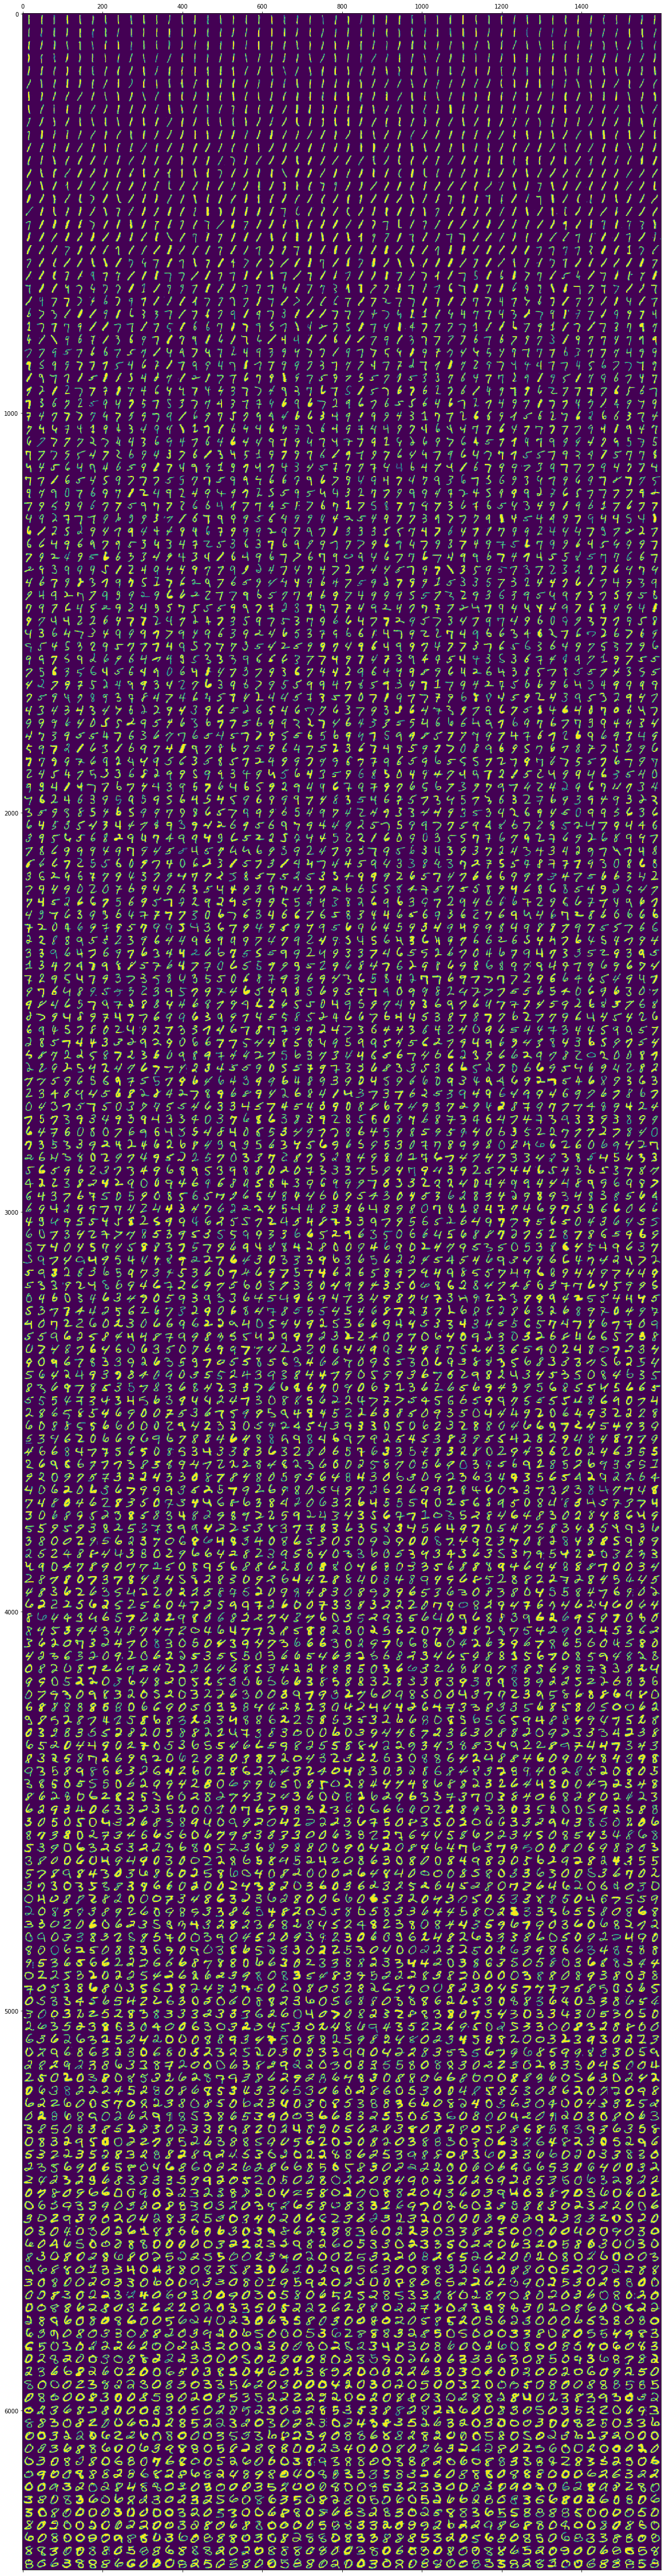

In [20]:
plt.figure(figsize=(20, 80))
m = 50
img_list = []
for i in range(0, 10000, m):
    imgs = []
    for j in range(m):
        ind = dims.argsort()[i + j]
        imgs.append(train_loader.dataset[ind][0])
    imgs = np.concatenate(imgs, axis=1)
    img_list.append(imgs)
plt.matshow(np.concatenate(img_list, axis=0), fignum=1)
plt.show()

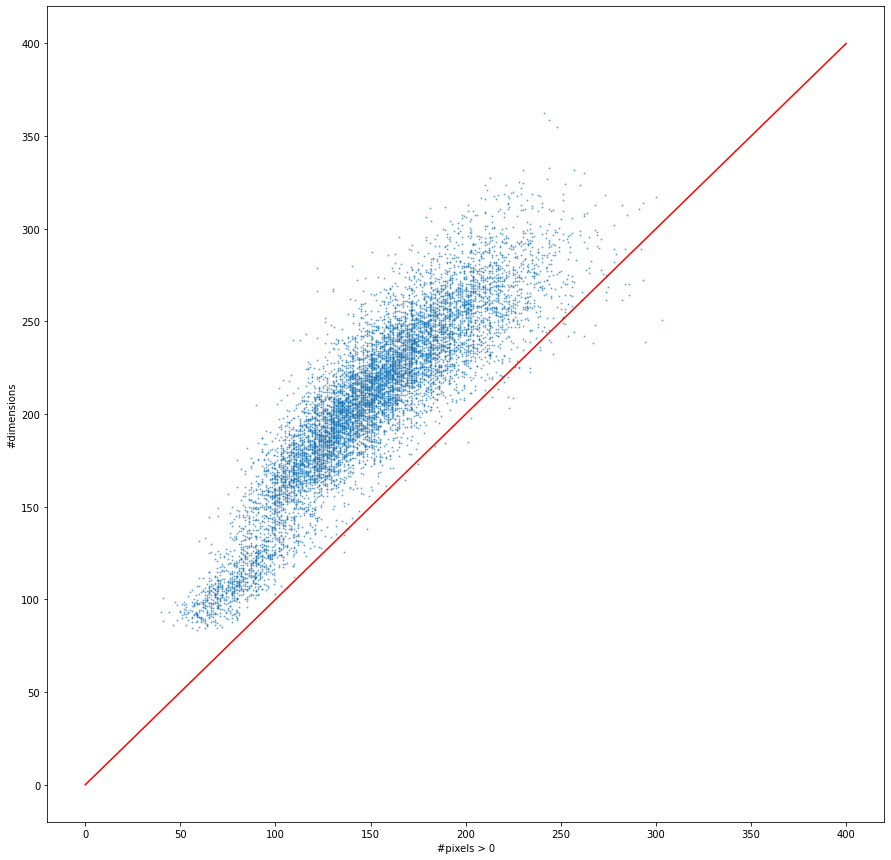

In [22]:
n_pix = []
for i in range(10000):
    n_pix.append((train_loader.dataset.tensors[i] > 0).sum().item())

plt.figure(figsize=(15,15))
plt.scatter(n_pix, dims, s=1, alpha=0.5)
plt.plot([0,400],[0,400], c='r')
plt.xlabel("#pixels > 0")
plt.ylabel("#dimensions");